In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [58]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [56]:
type(train_images[0])

numpy.ndarray

In [61]:
## GRAYSCALE
train_img_gray=np.empty((train_images.shape[0:3]))

for i in range(train_img_gray.shape[0]):
    train_img_gray[i] = cv2.cvtColor(np.array(train_images[i]), cv2.COLOR_RGB2GRAY)

In [62]:
## GRAYSCALE
test_img_gray=np.empty(test_images.shape[0:3])
for i in range(test_img_gray.shape[0]):
    test_img_gray[i] = cv2.cvtColor(np.array(test_images[i]), cv2.COLOR_RGB2GRAY)

In [9]:
import random
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

def random_image_to_hog():
    rnd = random.randint(0, 5000)
    #img = train_images[1]
    img = train_img_gray[rnd]
    label = train_labels[rnd][0]
    classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
    #fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),
     #               cells_per_block=(2, 2), visualize=True, channel_axis = -1)
    fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),
                     cells_per_block=(2, 2), visualize=True, channel_axis = None)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 3), sharex=True, sharey=True)
   

    ax1.axis('off')
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_title(classes[label])

    ax2.axis('off')
    ax2.imshow(hog_img, cmap=plt.cm.gray)
    ax2.set_title('HOG image')
    plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_20388\48522603.py:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),


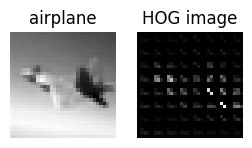

In [10]:
random_image_to_hog()

C:\Users\imane\AppData\Local\Temp\ipykernel_20388\48522603.py:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),


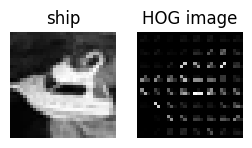

In [11]:
random_image_to_hog()

C:\Users\imane\AppData\Local\Temp\ipykernel_20388\48522603.py:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),


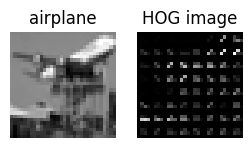

In [12]:
random_image_to_hog()

In [63]:
train_images = train_images.astype('float16')
train_images /= 255

test_images = test_images.astype('float16')
test_images /= 255

In [64]:
## GRAYSCALE
train_img_gray =  train_img_gray.astype('float16')
train_img_gray /= 255

test_img_gray =test_img_gray.astype('float16')
test_img_gray /= 255

In [ ]:
x_train_hog = []
for i in range(len(train_images)):
    fd , hog_im = hog(train_images[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  channel_axis = -1)
    x_train_hog.append(fd)

x_train_hog = np.array(x_train_hog)

In [16]:
x_test_hog = []
for i in range(len(test_images)):
    fd , hog_im = hog(test_images[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  channel_axis = -1)
    x_test_hog.append(fd)

x_test_hog = np.array(x_test_hog)

C:\Users\imane\AppData\Local\Temp\ipykernel_20388\2881514376.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd , hog_im = hog(test_images[i] , orientations=9 , pixels_per_cell = (8,8),


In [42]:
x_test_hog4.shape

(10000, 1568)

In [17]:
x_train_hog4 = []
for i in range(len(train_images)):
    fd , hog_im = hog(train_images[i] , orientations=8 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = True ,  channel_axis= -1)
    x_train_hog4.append(fd)

x_train_hog4 = np.array(x_train_hog4)       

C:\Users\imane\AppData\Local\Temp\ipykernel_20388\2244917634.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd , hog_im = hog(train_images[i] , orientations=8 , pixels_per_cell = (4,4),


In [65]:
## GRAYSCALE
x_train_hog_gray_4 = []
for i in range(len(train_img_gray)):
    fd = hog(train_img_gray[i] , orientations=8 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_train_hog_gray_4.append(fd)
    
x_train_hog_gray_4 = np.array(x_train_hog_gray_4) 

In [66]:
## GRAYSCALE
x_test_hog_gray_4 = []
for i in range(len(test_img_gray)):
    fd  = hog(test_img_gray[i] , orientations=8 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_test_hog_gray_4.append(fd)

x_test_hog_gray_4 = np.array(x_test_hog_gray_4)

In [45]:
x_test_hog4 = []
for i in range(len(test_images)):
    fd , hog_im = hog(test_images[i] , orientations=8 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = True ,  channel_axis = -1)
    x_test_hog4.append(fd)

x_test_hog4 = np.array(x_test_hog4)

In [21]:
from sklearn import svm
my_model = svm.SVC(kernel = 'rbf')
my_model.fit(x_train_hog , train_labels.ravel())

SVC()

In [22]:
from sklearn.svm import SVC

In [67]:
## GRAYSCALE kernel
ksvc_gray_4= SVC(kernel = 'rbf')
ksvc_gray_4.fit(x_train_hog_gray_4 , train_labels.ravel())

SVC()

In [ ]:
ksvc_gray = SVC(kernel = 'rbf').fit(x_train_hog_gray , train_labels.ravel())

In [24]:
my_model4 = SVC(kernel = 'rbf')
my_model4.fit(x_train_hog4 , train_labels.ravel())

SVC()

In [26]:
x_train_hog4.shape

(50000, 1568)

In [27]:
train_labels.ravel().shape

(50000,)

In [68]:
my_model4.score(x_train_hog4[:5000,:], train_labels.ravel()[:5000])

0.8838

In [70]:
##GRAYSCALE linear
lsvc_gray_4=LinearSVC().fit(x_train_hog_gray_4, train_labels.ravel())

C:\Users\imane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
lsvc_gray = LinearSVC().fit(x_train_hog_gray, train_labels.ravel())

In [30]:
from sklearn.svm import LinearSVC

In [33]:
x_test_hog_gray_4.shape

(10000, 1568)

In [34]:
lsvc = LinearSVC()

In [35]:
lsvc4 = LinearSVC()

In [48]:
lsvc.fit(x_train_hog, train_labels.ravel())

LinearSVC()

In [37]:
lsvc4.fit(x_train_hog4, train_labels.ravel())

C:\Users\imane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [49]:
lsvc.score(x_test_hog, test_labels.ravel())

0.535

In [ ]:
lsvc4.score(x_test_hog4, test_labels.ravel())

0.5423

In [ ]:
my_model4.score(x_test_hog4[500:1000,:], test_labels.ravel()[500:1000])

0.656

In [ ]:
my_model4.score(x_test_hog4[1000:2000,:], test_labels.ravel()[1000:2000])

0.626

In [ ]:
my_model4.score(x_test_hog4[2000:3000,:], test_labels.ravel()[2000:3000])

0.623

In [ ]:
my_model4.score(x_test_hog4, test_labels.ravel())

0.631

In [46]:
my_model.score(x_test_hog, test_labels.ravel())

0.6451

In [69]:
ksvc_gray_4.score(x_test_hog4, test_labels.ravel())

0.6235

In [ ]:
lsvc_gray_4.score(x_test_hog4, test_labels.ravel())

In [71]:
##GRAYSCALE linear
lsvc_gray_4.score(x_test_hog_gray_4, test_labels.ravel())

0.5193

### Summary:
- (8,8),9
__rbf 0.6451__
__linear 0.535__

- (8,8),8
__rbf 0.6428__
__linear 0.527__

- (4,4),9
__rbf __
__linear __

- (4,4),8
__rbf 0.631__
__linear 0.5423__

- GRAY: (4,4),8
__rbf 0.6235__
__linear 0.5193__


- GRAY (4,4),9
__rbf 0.6039__
__linear __

- GRAY: (8,8),9
__rbf 0.6171 __
__linear __

### Training and testing hog gray (8,8) 9

In [73]:
## GRAYSCALE
x_train_hog_gray_8 = []
for i in range(len(train_img_gray)):
    fd = hog(train_img_gray[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_train_hog_gray_8.append(fd)
    
x_train_hog_gray_8 = np.array(x_train_hog_gray_8) 

In [74]:
## GRAYSCALE
x_test_hog_gray_8 = []
for i in range(len(test_img_gray)):
    fd  = hog(test_img_gray[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_test_hog_gray_8.append(fd)

x_test_hog_gray_8 = np.array(x_test_hog_gray_8)

In [75]:
ksvc_gray = SVC(kernel = 'rbf').fit(x_train_hog_gray_8 , train_labels.ravel())

In [76]:
ksvc_gray.score(x_test_hog_gray_8, test_labels.ravel())

0.6171

### Training and testing hog  (4,4) 9 grayscale

In [77]:
## GRAYSCALE
x_train_hog_gray_4_9 = []
for i in range(len(train_img_gray)):
    fd = hog(train_img_gray[i] , orientations=9 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_train_hog_gray_4_9.append(fd)
    
x_train_hog_gray_4_9 = np.array(x_train_hog_gray_4_9) 

In [78]:
## GRAYSCALE
x_test_hog_gray_4_9 = []
for i in range(len(test_img_gray)):
    fd  = hog(test_img_gray[i] , orientations=9 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = None)
    x_test_hog_gray_4_9.append(fd)

x_test_hog_gray_4_9 = np.array(x_test_hog_gray_4_9)

In [79]:
ksvc_gray_4_9 = SVC(kernel = 'rbf').fit(x_train_hog_gray_4_9 , train_labels.ravel())

In [80]:
ksvc_gray_4_9.score(x_test_hog_gray_4_9, test_labels.ravel())

0.6039

### Training & testing (8,8),8

In [85]:
x_train_hog_8_8_8 = []
for i in range(len(train_images)):
    fd  = hog(train_images[i] , orientations=8 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = -1)
    x_train_hog_8_8_8.append(fd)

x_train_hog_8_8_8 = np.array(x_train_hog_8_8_8)

In [86]:
x_test_hog_8_8_8 = []
for i in range(len(test_images)):
    fd  = hog(test_images[i] , orientations=8 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis = -1)
    x_test_hog_8_8_8.append(fd)

x_test_hog_8_8_8 = np.array(x_test_hog_8_8_8)

In [87]:
ksvc_8_8_8 = SVC(kernel = 'rbf').fit(x_train_hog_8_8_8 , train_labels.ravel())

In [88]:
ksvc_8_8_8.score(x_test_hog_8_8_8, test_labels.ravel())

0.6428

In [89]:
lsvc_8_8_8 = LinearSVC().fit(x_train_hog_8_8_8, train_labels.ravel())

In [90]:
lsvc_8_8_8.score(x_test_hog_8_8_8, test_labels.ravel())

0.527

### Training & testing (4,4),9

In [92]:
x_train_hog_4_4_9 = []
for i in range(len(train_images)):
    fd  = hog(train_images[i] , orientations=9 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis= -1)
    x_train_hog_4_4_9.append(fd)

x_train_hog_4_4_9 = np.array(x_train_hog_4_4_9)   

In [93]:
x_test_hog_4_4_9 = []
for i in range(len(test_images)):
    fd  = hog(test_images[i] , orientations=9 , pixels_per_cell = (4,4),
                     cells_per_block = (2,2) , visualize = False ,  channel_axis= -1)
    x_test_hog_4_4_9.append(fd)

x_test_hog_4_4_9 = np.array(x_test_hog_4_4_9)   

In [ ]:
ksvc_4_4_9 = SVC(kernel = 'rbf').fit(x_train_hog_4_4_9 , train_labels.ravel())

In [ ]:
ksvc_4_4_9.score(x_test_hog_4_4_9, test_labels.ravel())

In [ ]:
lsvc_4_4_9 = LinearSVC().fit(x_train_hog_4_4_9, train_labels.ravel())

In [ ]:
lsvc_4_4_9.score(x_test_hog_4_4_9, test_labels.ravel())